### Importing Libraries

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Reading Data

In [206]:
df =pd.read_csv("annotated_points_np_201.csv")

In [207]:
data=np.array(df)

### Changing labels

In [208]:
data[data == 2.0] = -1

In [209]:
data

array([[ 3.81048387, 27.4512987 ,  1.        ],
       [ 6.35080645, 27.61363636,  1.        ],
       [ 7.56048387, 24.61038961,  1.        ],
       [ 8.52822581, 20.55194805,  1.        ],
       [ 8.22580645, 13.81493506,  1.        ],
       [ 8.58870968,  8.7012987 ,  1.        ],
       [ 6.59274194,  6.02272727,  1.        ],
       [ 4.35483871, 13.16558442,  1.        ],
       [ 5.14112903, 19.65909091,  1.        ],
       [ 4.71774194, 23.06818182,  1.        ],
       [ 2.35887097, 23.87987013,  1.        ],
       [ 1.51209677, 17.30519481,  1.        ],
       [ 1.93548387,  8.29545455,  1.        ],
       [ 3.81048387,  2.69480519,  1.        ],
       [ 8.83064516,  2.37012987,  1.        ],
       [12.82258065,  9.18831169,  1.        ],
       [13.18548387, 17.62987013,  1.        ],
       [11.73387097, 25.25974026,  1.        ],
       [ 9.85887097, 27.4512987 ,  1.        ],
       [ 6.29032258, 25.01623377,  1.        ],
       [12.09677419, 18.27922078,  1.   

### Data and Label division

In [210]:
coord_data=data[:,0:2]
y=data[:,2]

In [211]:
coord_data.shape

(200, 2)

In [212]:
y.shape

(200,)

### Algorithm implementation

##### variable shapes

In [213]:
print(y.shape)
print(coord_data.shape)
print(data.shape)

(200,)
(200, 2)
(200, 3)


##### Perceptron

In [214]:
def perceptron(D,iter,y):
    W=np.array([0]*D.shape[1])
    W0=0
    for t in range(iter):
        changed=False
        for i in range(D.shape[0]):
            if y[i]*(np.dot(W,D[i])+W0)<=0:
                W=W+y[i]*D[i]
                W0=W0+y[i]
                changed=True
        if not changed:
            break
    return W0,W

##### Bias and Weights

In [215]:
W0,W=perceptron(coord_data,10000,y)

In [216]:
W= np.insert(W,0, W0)
W

array([538.        , -59.09274194,  25.86038961])

##### Plotting

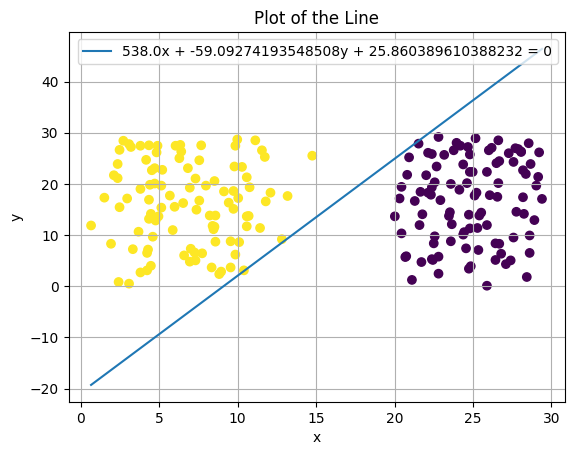

In [217]:
import numpy as np
import matplotlib.pyplot as plt

def plot_line(X,coefficients):
    # Extract coefficients for x, y, and the constant term
    a, b, c = coefficients

    # Generate x values
    x_values = np.linspace(min(X), max(X), 100)

    # Calculate corresponding y values using the equation of the line
    y_values = -( b * x_values + a) /c
    plt.scatter(coord_data[:, 0], coord_data[:, 1], c=y, cmap='viridis')
    # Plot the line
    plt.plot(x_values, y_values, label=f'{a}x + {b}y + {c} = 0')

    # Add labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Plot of the Line')

    # Add a grid for better readability
    plt.grid(True)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

# Example usage with your coefficients
coefficients = W
plot_line(coord_data[:,0],coefficients)


### For Random Generated data

##### Class 1

In [490]:
upper_limit = 15

# Generate a 100x2 matrix of random floating-point values
random_matrix1 = np.random.uniform(low=0, high=upper_limit, size=(100, 2))

# print(random_matrix)

##### Class 2

In [491]:
# Set the lower and upper limits for the random values
lower_limit = 20
upper_limit = 30

# Generate a 100x2 matrix of random floating-point values
random_matrix2 = np.random.uniform(low=lower_limit, high=upper_limit, size=(100, 2))

# print(random_matrix)

##### coordinate data

In [492]:
coord_data2=np.concatenate((random_matrix1,random_matrix2),axis=0)

##### extranting x for graph

In [493]:
coord_data2[:,0]

array([ 8.32885101, 12.49506772, 14.17119368,  0.26150113,  9.73140136,
       13.62138487,  0.18990421,  1.38138504,  4.33708544,  4.80322433,
       12.13404663,  8.94919796, 11.61453472, 14.09196939, 13.09117987,
        1.42079927, 13.8906831 ,  2.52287639,  7.42749261,  1.85076846,
        4.84856717, 12.03253594,  2.08943045,  6.96455468, 11.00012912,
        3.14549875,  5.32764394, 14.16794822,  3.40773924,  2.22620385,
        2.68396022, 13.27039376,  1.43814009,  1.28940603, 14.98497537,
       13.97915558,  1.12834268,  9.9887147 ,  2.52350673, 10.73685785,
        4.93221524,  0.16144222,  1.03609903,  8.46247796,  4.09553256,
        3.89193423, 12.28625362, 14.01250383, 10.94846802,  5.14314172,
        7.64603903,  0.89708219, 10.17445727, 10.26321762, 11.02706357,
        9.81559208,  8.13997885,  6.84626216,  4.73503419,  4.25316885,
        6.11781817,  8.18613103,  3.56511048,  6.81705341,  3.95634212,
        6.17115632, 14.648785  , 14.98067561,  3.70683802, 11.49

##### making labels

In [494]:
label=np.concatenate((np.ones(100),(-1)*np.ones(100)))
label

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

##### training in perceptron

In [495]:
W2_0,W2=perceptron(coord_data2,10000,label)

In [496]:
W2= np.insert(W2,0, W2_0)
W2

array([367.        , -25.60315102,   2.92247826])

##### Plotting

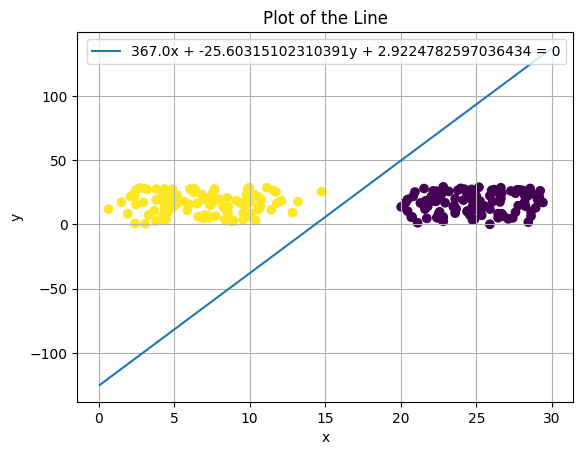

In [497]:
plot_line(coord_data2[:,0],W2)